In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

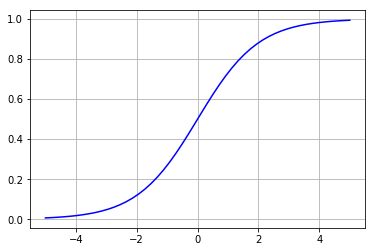

In [8]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
x=np.linspace(-5,5,50)
plt.plot(x,sigmoid(x),'b')
plt.grid()


In [9]:
# softmax

In [14]:
softmax = lambda W: np.exp(np.array(W)) / np.sum(np.exp(np.array(W)))

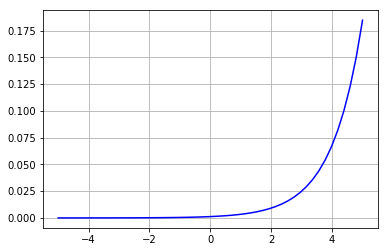

In [15]:
x=np.linspace(-5,5,50)
W=softmax(x)
plt.plot(x,W,'b')
plt.grid()

In [23]:
# ReLU

In [28]:
ReLU = lambda w: np.maximum(w,0)

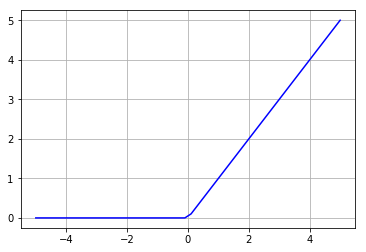

In [30]:
x=np.linspace(-5,5,50)
plt.plot(x,ReLU(x),'b')
plt.grid()

# TensorFlow

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
%matplotlib inline


In [41]:
dados_df = pd.read_csv('pesos-alturas.csv',decimal=',')

In [42]:
dados_df.head()

,Pesos,Alturas
0,74,1.73
1,61,1.62
2,61,1.63
3,68,1.68
4,70,1.68


In [125]:
X_train, X_test, y_train, y_test = train_test_split(dados_df[['Alturas']],dados_df[['Pesos']], 
                                                    test_size=0.33)

In [126]:
# Definindo os coeficientes (aquilo que queremos calcular):
# y = ax + b

In [127]:
a = tf.Variable(np.random.randn(), name="ca")
b = tf.Variable(np.random.randn(), name="cl")

In [128]:
# Definindo as variáveis (dependente e independente):

In [129]:
x = tf.placeholder("float")
y = tf.placeholder("float")

In [130]:
# Definindo o modelo:

In [131]:
y_hat = tf.add(tf.multiply(x, a), b)

In [132]:
# Definindo a função de perda:

In [153]:
perda = tf.reduce_sum(tf.pow(y_hat - y, 2)/2)

In [154]:
# Otimização:

In [155]:
l_rate = 0.001

In [156]:
otim = tf.train.GradientDescentOptimizer(l_rate).minimize(perda)
init = tf.global_variables_initializer()

In [157]:
# Vamos rodar. Vou repetir o treino para evitar o problema do "mínimo local":

a 0.214154 b -1.87968
a 96.9161 b -94.9782


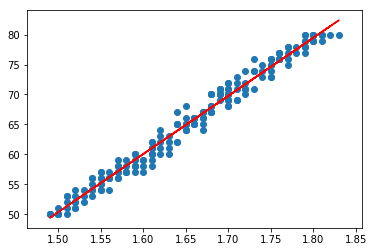

In [161]:
epochs = 10000 
with tf.Session() as sess:
    sess.run(init)
    print('a',sess.run(a),'b',sess.run(b))    
    for epoch in range(epochs):
        sess.run(otim, feed_dict={x: X_train, y: y_train})
    plt.scatter(X_train, y_train)
    print('a',sess.run(a),'b',sess.run(b))
    plt.plot(X_train, sess.run(a) * X_train + sess.run(b),c="r")